In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from regression_ViT import regression_ViT as ViT

import matplotlib.pyplot as plt
import numpy as np

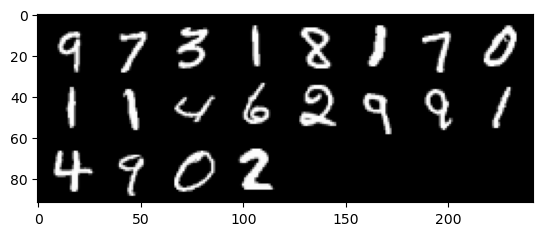

    9     7     3     1


In [2]:
# import mnist dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=20, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=20, shuffle=False, num_workers=2)

# show some images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# print images
plt.imshow(np.transpose(torchvision.utils.make_grid(images).numpy(), (1, 2, 0)))
plt.show()

# print labels
print(' '.join('%5s' % labels[j].item() for j in range(4)))

In [3]:
model = ViT(image_size=28, 
        patch_size=4, 
        channels=1,
        dim=64, 
        depth=6, 
        heads=8, 
        mlp_dim=128)

In [4]:
(28//4)**2

49

In [5]:
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 1
n_total_steps = len(trainloader)

attention = []

# train the network
for epoch in range(num_epochs):  # loop over the dataset multiple times

    print(f"Epoch {epoch+1} of {2}")

    for i, data in enumerate(trainloader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        labels = labels.unsqueeze(1).float()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output, attention_weights = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        attention.append(attention_weights)
     
        # verbosity 
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}; step {i+1}/{n_total_steps}, loss={loss.item():.4f}') 
            
    


            
print('Finished Training')

Epoch 1 of 2
epoch 1/1; step 100/3000, loss=5.7848
epoch 1/1; step 200/3000, loss=9.0664
epoch 1/1; step 300/3000, loss=7.6647
epoch 1/1; step 400/3000, loss=9.6570
epoch 1/1; step 500/3000, loss=9.6295
epoch 1/1; step 600/3000, loss=7.1685
epoch 1/1; step 700/3000, loss=6.3352
epoch 1/1; step 800/3000, loss=7.0037
epoch 1/1; step 900/3000, loss=8.8702
epoch 1/1; step 1000/3000, loss=5.6978
epoch 1/1; step 1100/3000, loss=3.7957
epoch 1/1; step 1200/3000, loss=4.2476
epoch 1/1; step 1300/3000, loss=2.4132
epoch 1/1; step 1400/3000, loss=4.4583
epoch 1/1; step 1500/3000, loss=2.7315
epoch 1/1; step 1600/3000, loss=0.7610
epoch 1/1; step 1700/3000, loss=2.0607


KeyboardInterrupt: 

In [6]:
total_samples = len(testloader.dataset)
total_loss = 0

with torch.no_grad():
    for data, target in testloader:
        
        output = model(data)
        loss = criterion(output, target.unsqueeze(1).float())
        
        total_loss += loss.item()
    

# regression accuracy
print(f"Accuracy: {100 - total_loss/total_samples*100:.2f}%")



Accuracy: 96.26%


Accuracy: 96.55%

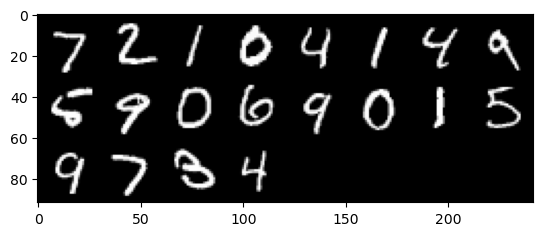

GroundTruth:      7     2     1     0
Predicted:  6.5371 2.2542 0.9936 0.0166


In [7]:
# predict an image
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
plt.imshow(np.transpose(torchvision.utils.make_grid(images).numpy(), (1, 2, 0)))
plt.show()

# print labels
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(4)))

outputs = model(images)

print('Predicted: ', ' '.join('%5s' % np.round(outputs[j].item(),4) for j in range(4)))